# Data Visualization Milestone 1 EDA Notebook

In [1]:
import pandas as pd
import numpy as np
import json
import gzip as gunzip
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)
from datetime import datetime
import pytz
import ast 
print(datetime.today().strftime("%d-%b-%Y %a"), "Notebook")
tz_Suisse = pytz.timezone('Europe/Zurich')
current_time= datetime.now(tz_Suisse)
print("Lausanne Time : ", current_time.strftime("%H:%M:%S"))

19-Apr-2024 Fri Notebook
Lausanne Time :  16:58:51


# Michelin Guide Dataset

The dataset consists of **6794 rows**, each representing a unique Michelin-starred restaurant. 

This dataset encompasses **13 columns** which provide various details about the restaurants such as:

- `Name`
- `Address`
- `Location`
- `Price`
- `Cuisine`
- `Longitude`
- `Latitude`
- `PhoneNumber`
- `Url`
- `WebsiteUrl`
- `Award`   (Michelin star count and a special Bib Gourmand status)
- `FacilitiesAndServices`
- `Description` (taken from the Michelin Guide Website)

In [6]:
# Reading data
michelin_df = pd.read_csv(
    "../data/michelin_my_maps.csv")

michelin_df.head()

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Description
0,L'OSIER,"7-5-5 Ginza, Chuo-ku, Tokyo, 104-0061, Japan","Tokyo, Japan",¥¥¥¥,"French, Contemporary",139.761203,35.669667,8.133572e+10,https://guide.michelin.com/en/tokyo-region/tok...,https://losier.shiseido.co.jp/,3 Stars,"Air conditioning,Car park,Interesting wine list",In 2023 L’OSIER celebrated the 50th anniversar...
1,Azabu Kadowaki,"2-7-2 Azabujuban, Minato-ku, Tokyo, 106-0045, ...","Tokyo, Japan",¥¥¥¥,Japanese,139.733551,35.655993,8.135772e+10,https://guide.michelin.com/en/tokyo-region/tok...,NaN,3 Stars,"Air conditioning,Counter dining",Toshiya Kadowaki’s aim is to serve up “unforge...
2,Kohaku,"3-4 Kagurazaka, Shinjuku-ku, Tokyo, 162-0825, ...","Tokyo, Japan",¥¥¥¥,Japanese,139.741008,35.700701,8.150314e+11,https://guide.michelin.com/en/tokyo-region/tok...,http://kagurazaka-kohaku.jp/,3 Stars,"Air conditioning,Counter dining,Interesting wi...",Koji Koizumi creates a cuisine all his own as ...
3,Harutaka,"6F, 8-3-1 Ginza, Chuo-ku, Tokyo, 104-0061, Japan","Tokyo, Japan",¥¥¥¥,Sushi,139.759203,35.669269,8.133573e+10,https://guide.michelin.com/en/tokyo-region/tok...,NaN,3 Stars,"Air conditioning,Counter dining",Sometimes our connections intervene to change ...
4,Kanda,"1F, Toranomon Hills Residential Tower, 1-1-1 A...","Tokyo, Japan",¥¥¥¥,Japanese,139.748000,35.665800,8.136459e+10,https://guide.michelin.com/en/tokyo-region/tok...,http://www.nihonryori-kanda.com/,3 Stars,"Air conditioning,Counter dining,Interesting wi...",Hiroyuki Kanda understands the essence of Japa...


In [7]:
# shape of the DataFrame
print(michelin_df.shape)

(6794, 13)


In [8]:
print(michelin_df.iloc[0])

Name                                                               L'OSIER
Address                       7-5-5 Ginza, Chuo-ku, Tokyo, 104-0061, Japan
Location                                                      Tokyo, Japan
Price                                                                 ¥¥¥¥
Cuisine                                               French, Contemporary
Longitude                                                       139.761203
Latitude                                                         35.669667
PhoneNumber                                                  81335716050.0
Url                      https://guide.michelin.com/en/tokyo-region/tok...
WebsiteUrl                                  https://losier.shiseido.co.jp/
Award                                                              3 Stars
FacilitiesAndServices      Air conditioning,Car park,Interesting wine list
Description              In 2023 L’OSIER celebrated the 50th anniversar...
Name: 0, dtype: object


**Let's check how many null entries available in our michelin guide dataset**

In [9]:
michelin_df.isna().sum()

Name                        0
Address                     0
Location                    0
Price                       2
Cuisine                     0
Longitude                   0
Latitude                    0
PhoneNumber               159
Url                         0
WebsiteUrl               1242
Award                       0
FacilitiesAndServices     234
Description                 0
dtype: int64

The dataset appears to be comprehensive with essential attributes like `Name`, `Address`, `Location`, and `Cuisine` present for every entry, ensuring a solid foundation for analysis of the Michelin Guide establishments. 

The absence of `PhoneNumber` and `WebsiteUrl` in several entries could be due to various factors, such as newer restaurants not yet having established online presence or certain establishments opting for privacy. 

Additionally, the lack of details in `FacilitiesAndServices` for some listings might indicate that not all restaurants have provided full information, or it could reflect variances in data collection processes.

In [10]:
# award distribution
michelin_df.Award.value_counts()

Bib Gourmand    3333
1 Star          2844
2 Stars          474
3 Stars          143
Name: Award, dtype: int64

In [11]:
# Locational Distribution
michelin_df.Location.value_counts()[:20]

Tokyo, Japan                      309
Kyoto, Japan                      193
Osaka, Japan                      189
New York, USA                     156
Paris, France                     156
Singapore                         132
London, United Kingdom            106
Hong Kong                          89
Seoul, South Korea                 89
Bangkok, Thailand                  87
Taipei, Taiwan                     80
Shanghai, China Mainland           77
Chicago, USA                       67
Guangzhou, China Mainland          61
Washington, USA                    54
Beijing, China Mainland            53
Hong Kong, Hong Kong SAR China     50
Madrid, Spain                      43
San Francisco, USA                 42
Nara, Japan                        42
Name: Location, dtype: int64

The dataset contains two different representations of "Hong Kong":
- "Hong Kong, Hong Kong SAR China"
- "Hong Kong"

To ensure consistency, we are converting all occurrences of "Hong Kong" to "Hong Kong, Hong Kong SAR China".

In [12]:
# Exact match replacement
michelin_df.loc[michelin_df['Location'] == 'Hong Kong', 'Location'] = 'Hong Kong, Hong Kong SAR China'

# To ensure that any variation of 'Hong Kong' including those with trailing spaces are also replaced
# You can use .str.replace() for a pattern match and replace
michelin_df['Location'] = michelin_df['Location'].str.replace(r'^Hong Kong$', 'Hong Kong, Hong Kong SAR China', regex=True)

# Filter rows where the Location includes 'Hong Kong'
hong_kong_rows = michelin_df[michelin_df.Location.str.contains("Hong Kong")]

# Display the filtered rows
hong_kong_rows.Award.value_counts()

Bib Gourmand    64
1 Star          56
2 Stars         12
3 Stars          7
Name: Award, dtype: int64

## EDA Step 1: Country

The `Location` column contains entries in the format "City, Country". To extract the country information, we split each entry by comma and select the last part. This step allows us to isolate the country name.

However, certain entries require special handling:
- "Abu Dhabi" and "Dubai" are both cities in the United Arab Emirates, so we replace them with "United Arab Emirates" to maintain consistency.
- "Macau" is a Special Administrative Region (SAR) of China, so we replace it with "Macau SAR China" for accuracy.
- "Czechia" is the formal short name for the Czech Republic, so we replace it accordingly to use easily in visualizations.

These adjustments ensure uniformity and accuracy in the representation of countries across the dataset.



In [13]:
# Split the Location by comma and select the last part for the Country
michelin_df['Country'] = michelin_df['Location'].str.split(', ').str[-1]
michelin_df['Country'] = michelin_df['Country'].replace('Abu Dhabi', 'United Arab Emirates')
michelin_df['Country'] = michelin_df['Country'].replace('Dubai', 'United Arab Emirates')
michelin_df['Country'] = michelin_df['Country'].replace('Macau', 'Macau SAR China')
michelin_df['Country'] = michelin_df['Country'].replace('Czechia', 'Czech Republic')

# Extended mapping of country names to their flag emojis
flag_emojis = {
    'France': '🇫🇷',
    'Japan': '🇯🇵',
    'Italy': '🇮🇹',
    'USA': '🇺🇸',
    'Germany': '🇩🇪',
    'Spain': '🇪🇸',
    'United Kingdom': '🇬🇧',
    'Belgium': '🇧🇪',
    'Switzerland': '🇨🇭',
    'China Mainland': '🇨🇳',
    'Thailand': '🇹🇭',
    'Netherlands': '🇳🇱',
    'Taiwan': '🇹🇼',
    'Hong Kong SAR China': '🇭🇰',
    'Singapore': '🇸🇬',
    'South Korea': '🇰🇷',
    'Portugal': '🇵🇹',
    'Canada': '🇨🇦',
    'Malaysia': '🇲🇾',
    'Brazil': '🇧🇷',
    'Denmark': '🇩🇰',
    'United Arab Emirates': '🇦🇪',
    'Türkiye': '🇹🇷',
    'Vietnam': '🇻🇳',
    'Ireland': '🇮🇪',
    'Sweden': '🇸🇪',
    'Austria': '🇦🇹',
    'Croatia': '🇭🇷',
    'Macau SAR China': '🇲🇴',
    'Norway': '🇳🇴',
    'Greece': '🇬🇷',
    'Slovenia': '🇸🇮',
    'Luxembourg': '🇱🇺',
    'Hungary': '🇭🇺',
    'Argentina': '🇦🇷',
    'Poland': '🇵🇱',
    'Malta': '🇲🇹',
    'Finland': '🇫🇮',
    'Estonia': '🇪🇪',
    'Latvia': '🇱🇻',
    'Iceland': '🇮🇸',
    'Czech Republic': '🇨🇿',  # Note: Czechia and Czech Republic are the same
    'Serbia': '🇷🇸',
    'Andorra': '🇦🇩',
}

# Get the value counts of the countries and convert it to a DataFrame for Plotly
country_counts_df = michelin_df['Country'].value_counts().reset_index()
country_counts_df.columns = ['Country', 'Restaurant Count']

# Ensure the DataFrame is sorted by 'Restaurant Count' for better visual appearance
country_counts_df = country_counts_df.sort_values('Restaurant Count', ascending=False)
# Assume 'country_counts_df' has 'Country' column from your dataset
country_counts_df['Country With Flag'] = country_counts_df['Country'].apply(lambda x: f"{flag_emojis.get(x, '')} {x}")

We created two visualizations based on the Michelin Guide dataset with respect to `Country`:

1. Interactive Visualization:
   We developed an interactive visualization using Plotly This visualization offers dynamic features such as hover interactions and zoom capabilities. To interact with this visualization, you need to clone the repository and run the notebook locally.

2. Static Visualization:
   In addition to the interactive visualization, we also generated a static visualization using Matplotlib and Seaborn. This static visualization is included directly in the notebook and can be viewed easily on GitHub or any Markdown viewer without the need for additional setup.

### Interactive Visualization for Country

In [14]:
import plotly.express as px

# Define a custom "Mint" color scale
michelin_inspired_color_scale = [
    [0.25, "#ffcccc"],  # Soluk kırmızı
    [0.5, "#ff9999"],  # Orta kırmızı
    [0.75, "#ff6666"],  # Daha koyu kırmızı
    [1, "#bf0000"]  # Michelin bordosu
]

base_height = 300
height_per_country = 20
fig_height = base_height + height_per_country * len(country_counts_df)

# Create a bar plot with improved layout for y-axis labels visibility
fig = px.bar(country_counts_df, 
             y='Country', 
             x='Restaurant Count', 
             orientation='h',
             title='Michelin Guide Listings by Country',
             template='simple_white',
             color='Restaurant Count',
             color_continuous_scale=michelin_inspired_color_scale,
             height=fig_height)  # Adjusted height based on the number of countries

# Customize hover data for additional interactivity and information richness
fig.update_traces(
    customdata=country_counts_df['Country'].apply(lambda x: flag_emojis.get(x, '')),
    hovertemplate="<b>Country:</b> %{y} %{customdata}<br><b>Restaurant Count:</b> %{x}<extra></extra>",
    marker=dict(line=dict(color='#EAEAEA', width=1))
)

# Improve layout for clarity and readability
fig.update_layout(
    xaxis_title='Number of Listings',
    yaxis_title='Country',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Arial, sans-serif"
    ),
    title_font=dict(size=25, color='#333', family="Arial, sans-serif"),
    font=dict(family="Arial, sans-serif", color='#333'),
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(255,255,255,1)',
    margin=dict(t=100, l=150),  # Adjusted left margin for longer country names
    yaxis=dict(autorange="reversed", tickmode='linear')  # Ensure all country names are shown
)

# Optionally, adjust font size for the axis labels if needed
fig.update_yaxes(tickfont=dict(size=10))

# Show the figure
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Non-interactive Visualization

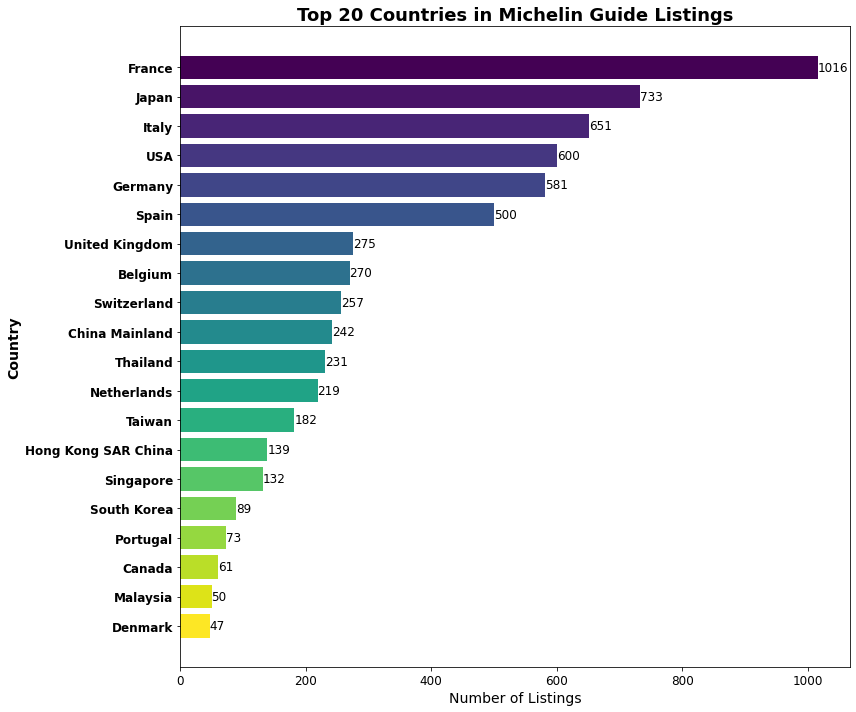

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame for better visualization and slice to get the top 20 countries
country_counts_df_sorted = country_counts_df.sort_values('Restaurant Count', ascending=True).tail(20)

# Generate a color map or a list of colors for the top 20 entries
colors = plt.cm.viridis(np.linspace(1, 0, 20))

# Adjusting the figure size for better proportionality
plt.figure(figsize=(12, 10))  # Adjusted width and height for 20 countries

bars = plt.barh(country_counts_df_sorted['Country'], country_counts_df_sorted['Restaurant Count'], color=colors)

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2., f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=12)  # Increased fontsize here

# Customize the plot
plt.xlabel('Number of Listings', fontsize=14)  # Increased fontsize
plt.ylabel('Country', fontsize=14, fontweight='bold')  # Increased fontsize and made bold
plt.title('Top 20 Countries in Michelin Guide Listings', fontsize=18, fontweight='bold')  # Increased fontsize
plt.xticks(fontsize=12)  # Increased fontsize for x-axis tick labels
plt.yticks(fontsize=12, fontweight='bold')  # Increased fontsize and made bold for y-axis tick labels
plt.tight_layout()

# Show the plot
plt.show()






## EDA Step 2: Continent

We created a new attribute called `Continent` based on the `Country` attribute in the Michelin Guide dataset.

To assign continents to countries, we used a pre-defined mapping called 'continent_mapping', where each country is associated with its corresponding continent. This mapping allows us to efficiently assign continents to countries without manually specifying them for each entry.

We used the pandas `map()` function to apply the `continent_mapping` to the `Country` attribute, resulting in the creation of the new `Continent` attribute. For each country in the dataset, the `map()` function looks up the corresponding continent in the `continent_mapping` and assigns it to the `Continent` attribute.

This process helps to categorize the Michelin Guide listings by continent, providing additional insights into the geographical distribution of Michelin-recognized restaurants.

In [ ]:
continent_mapping = {
    'France': 'Europe',
    'Japan': 'Asia',
    'Italy': 'Europe',
    'USA': 'North America',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'United Kingdom': 'Europe',
    'Belgium': 'Europe',
    'Switzerland': 'Europe',
    'China Mainland': 'Asia',
    'Thailand': 'Asia',
    'Netherlands': 'Europe',
    'Taiwan': 'Asia',
    'Hong Kong SAR China': 'Asia',
    'Singapore': 'Asia',
    'South Korea': 'Asia',
    'Portugal': 'Europe',
    'Canada': 'North America',
    'Malaysia': 'Asia',
    'Brazil': 'South America',
    'Denmark': 'Europe',
    'United Arab Emirates': 'Asia',
    'Türkiye': 'Europe',
    'Vietnam': 'Asia',
    'Ireland': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Croatia': 'Europe',
    'Macau SAR China': 'Asia',
    'Norway': 'Europe',
    'Greece': 'Europe',
    'Slovenia': 'Europe',
    'Luxembourg': 'Europe',
    'Hungary': 'Europe',
    'Argentina': 'South America',
    'Poland': 'Europe',
    'Malta': 'Europe',
    'Finland': 'Europe',
    'Estonia': 'Europe',
    'Latvia': 'Europe',
    'Iceland': 'Europe',
    'Czech Republic': 'Europe',
    'Serbia': 'Europe',
    'Andorra': 'Europe',
}

# Assuming 'country_counts_df' is your DataFrame and it has a column named 'Country'
# that matches the keys in the 'continent_mapping'
michelin_df['Continent'] = michelin_df['Country'].map(continent_mapping)

NameError: name 'michelin_df' is not defined

In [ ]:
#Distributions
michelin_df.Continent.value_counts()

NameError: name 'michelin_df' is not defined

Similarly, we created two visualizations based on the Michelin Guide dataset with respect to `Continent`

### Interactive Visualization for Continent

In [15]:
import plotly.express as px

# Assuming michelin_df has a column named 'Continent'
continent_counts = michelin_df['Continent'].value_counts()
# Convert Series to DataFrame for easier manipulation
continent_counts_df = continent_counts.reset_index()
continent_counts_df.columns = ['Continent', 'Listings']

# Since Plotly's built-in continent support can be limited, use country ISO codes and aggregate for continents
# Mapping continents to one or more representative ISO Alpha-3 country codes for visualization purposes
continent_iso_a3 = {
    'Europe': ['FRA', 'DEU', 'ITA', 'ESP', 'GBR', 'BEL', 'CHE', 'NLD', 'PRT', 'DNK', 'SWE', 'AUT', 'HRV', 'NOR', 'GRC', 'SVN', 'LUX', 'HUN', 'POL', 'MLT', 'FIN', 'EST', 'LVA', 'ISL', 'CZE', 'SRB', 'AND', 'IRL'],  # Added European countries
    'Asia': ['CHN', 'JPN', 'IND', 'THA', 'TWN', 'HKG', 'SGP', 'KOR', 'MYS', 'ARE', 'TUR', 'VNM', 'MAC'],  # Added Asian countries
    'North America': ['USA', 'CAN', 'MEX'],  # North America already defined
    'South America': ['BRA', 'ARG', 'COL'],  # South America already defined
}

# Expand the DataFrame to include a row for each ISO code representing a continent
expanded_rows = []
for index, row in continent_counts_df.iterrows():
    for iso in continent_iso_a3.get(row['Continent'], []):
        expanded_rows.append({'ISO_A3': iso, 'Listings': row['Listings'], 'Continent': row['Continent']})
expanded_df = pd.DataFrame(expanded_rows)

# Create a choropleth map using the expanded DataFrame
fig = px.choropleth(expanded_df,
                    locations="ISO_A3",
                    color="Listings",
                    hover_name="Continent",
                    color_continuous_scale=px.colors.sequential.OrRd)

# Update layout for a better view
fig.update_layout(
    title_text='Michelin Guide Listings by Continent',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth',  # More conventional world map projection
        showcountries=True,  # Outline the countries
        showland=True,  # Show land
        countrywidth=0.5,  # Width of country borders
        landcolor='lightgrey',  # Color of land
        countrycolor='grey',  # Color of country borders
        bgcolor='lightblue',  # Set ocean color to blue
        lakecolor= 'blue'
    ),
    margin={"r":0,"t":50,"l":0,"b":0}  # Adjust margins to fit the layout
)

# Show the figure
fig.show()



KeyError: 'Continent'

<ipython-input-15-c3956589c9b2>:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



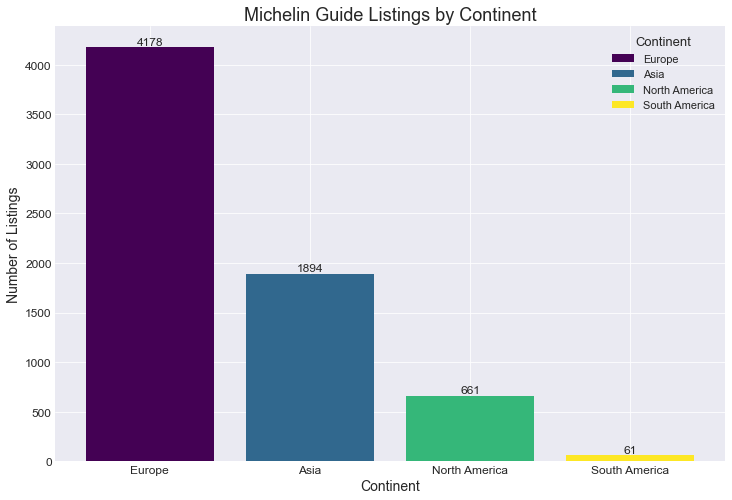

In [ ]:

# Sorting the dataframe 
continent_counts_df_sorted = continent_counts_df.sort_values('Listings', ascending=False)

# Generate a color map or a list of colors
colors = plt.cm.viridis(np.linspace(0, 1, 4))

# Modernizing the look with minimalistic style
plt.style.use('seaborn-darkgrid')
# Create the plot
plt.figure(figsize=(12, 8))  # Adjusted figure size for better visibility
bars = plt.bar(continent_counts_df_sorted['Continent'], continent_counts_df_sorted['Listings'], color= colors)  # Changed bar color to teal

plt.title('Michelin Guide Listings by Continent', fontsize=18)  # Adjusted title font size
plt.xlabel('Continent', fontsize=14)  # Adjusted x-axis label font size
plt.ylabel('Number of Listings', fontsize=14)  # Adjusted y-axis label font size
# Adjust tick font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Loop over the bars and use the 'text' function to put a label above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12, rotation=0)

# Creating a custom legend
handles, labels = [], []
for i, bar in enumerate(bars):
    handles.append(bar)
    labels.append(continent_counts_df_sorted.iloc[i]['Continent'])
plt.legend(handles, labels, title="Continent", title_fontsize='13', fontsize='11', loc='upper right')

plt.show()  # Display the plot


## EDA Step 3: Cuisine

In [ ]:
michelin_df.Cuisine.value_counts()[:20]

Modern Cuisine              918
Creative                    384
Japanese                    278
Traditional Cuisine         203
Street Food                 168
French                      135
Contemporary                134
Italian                     119
Cantonese                   115
Creative, Modern Cuisine     90
Thai                         80
Classic Cuisine              78
Sushi                        74
Noodles                      72
Modern French                71
Modern British               68
Modern Cuisine, Creative     67
Seafood                      66
Chinese                      57
Farm to table                53
Name: Cuisine, dtype: int64


We are creating a new attribute called 'PrimaryCuisine' based on the 'Cuisine' attribute in the Michelin Guide dataset.

To extract the primary cuisine of each restaurant, we use the pandas 'str.split()' function to split the 'Cuisine' attribute by comma and then select the first part. This process allows us to isolate the primary cuisine from any additional cuisines listed.

After extracting the primary cuisines, we use the 'value_counts()' function to count the occurrences of each cuisine and display the top 20 primary cuisines. This provides insight into the distribution and popularity of different cuisines among Michelin-recognized restaurants.

This analysis helps identify trends and preferences in culinary offerings across the Michelin Guide listings.


In [ ]:
michelin_df['PrimaryCuisine'] = michelin_df['Cuisine'].str.split(', ').str[0]
michelin_df.PrimaryCuisine.value_counts()[:20]

Modern Cuisine           1197
Creative                  651
Japanese                  362
Contemporary              283
Traditional Cuisine       259
Country cooking           210
French                    188
Italian                   187
Street Food               168
Classic Cuisine           139
Farm to table             126
Modern French             120
Cantonese                 116
Seafood                   113
Mediterranean Cuisine     107
Chinese                   104
Regional Cuisine          103
Thai                       91
Sushi                      74
Noodles                    73
Name: PrimaryCuisine, dtype: int64

### Non-Interactive Visualization

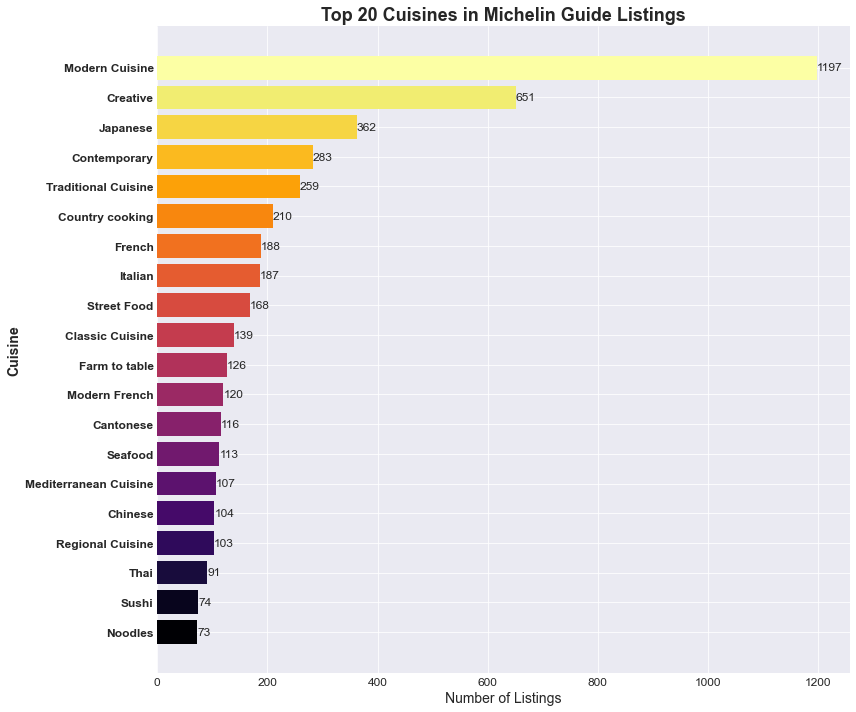

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cuisine_counts = michelin_df['PrimaryCuisine'].value_counts()
# Convert Series to DataFrame for easier manipulation
cuisine_counts_df = cuisine_counts.reset_index()
cuisine_counts_df.columns = ['Cuisine', 'Listings']

# Sort the DataFrame for better visualization and slice to get the top 20 cuisines
cuisine_counts_df_sorted = cuisine_counts_df.sort_values('Listings', ascending=True).tail(20)

# Generate a color map or a list of colors for the top 20 entries
colors = plt.cm.inferno(np.linspace(0, 1, 20))

# Adjusting the figure size for better proportionality
plt.figure(figsize=(12, 10))  # Adjusted width and height for 20 countries

bars = plt.barh(cuisine_counts_df_sorted['Cuisine'], cuisine_counts_df_sorted['Listings'], color=colors)

# Add value labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2., f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=12)  # Increased fontsize here

# Customize the plot
plt.xlabel('Number of Listings', fontsize=14)  # Increased fontsize
plt.ylabel('Cuisine', fontsize=14, fontweight='bold')  # Increased fontsize and made bold
plt.title('Top 20 Cuisines in Michelin Guide Listings', fontsize=18, fontweight='bold')  # Increased fontsize
plt.xticks(fontsize=12)  # Increased fontsize for x-axis tick labels
plt.yticks(fontsize=12, fontweight='bold')  # Increased fontsize and made bold for y-axis tick labels
plt.tight_layout()

# Show the plot
plt.show()

---

## EDA Step 4: Facilities and Services

In [16]:
# Fill NaN values in the 'FacilitiesAndServices' column with a default string
michelin_df['FacilitiesAndServices'] = michelin_df['FacilitiesAndServices'].fillna('No facility and/or service listed')

# Initialize a dictionary to store facilities and services with their counts
facilities_and_services_count = {}

# Iterate through each row in the DataFrame
for index, row in michelin_df.iterrows():
    # Split the values in the 'FacilitiesAndServices' column by comma
    facilities = row['FacilitiesAndServices'].split(',')
    # Update counts for each facility or service in the dictionary
    for facility in facilities:
        facility = facility.strip()  # Remove leading and trailing whitespace
        if facility in facilities_and_services_count:
            facilities_and_services_count[facility] += 1
        else:
            facilities_and_services_count[facility] = 1

# Print the dictionary of facilities and services with their counts
print(facilities_and_services_count)


{'Air conditioning': 4694, 'Car park': 2177, 'Interesting wine list': 1741, 'Counter dining': 1062, 'Wheelchair access': 2142, 'Notable sake list': 127, 'Restaurant offering vegetarian menus': 1034, 'Great view': 653, 'Terrace': 2717, 'Garden or park': 533, 'Valet parking': 455, 'No facility and/or service listed': 234, 'Shoes must be removed': 57, 'Cash only': 557, 'Cash only - lunch': 36, 'Brunch': 142, 'Credit cards not accepted': 80, 'Foreign credit cards not accepted': 41, 'Bring your own bottle': 12, 'Booking essential': 5, 'Reservations not accepted': 2}


### Non-Interactive Visualization

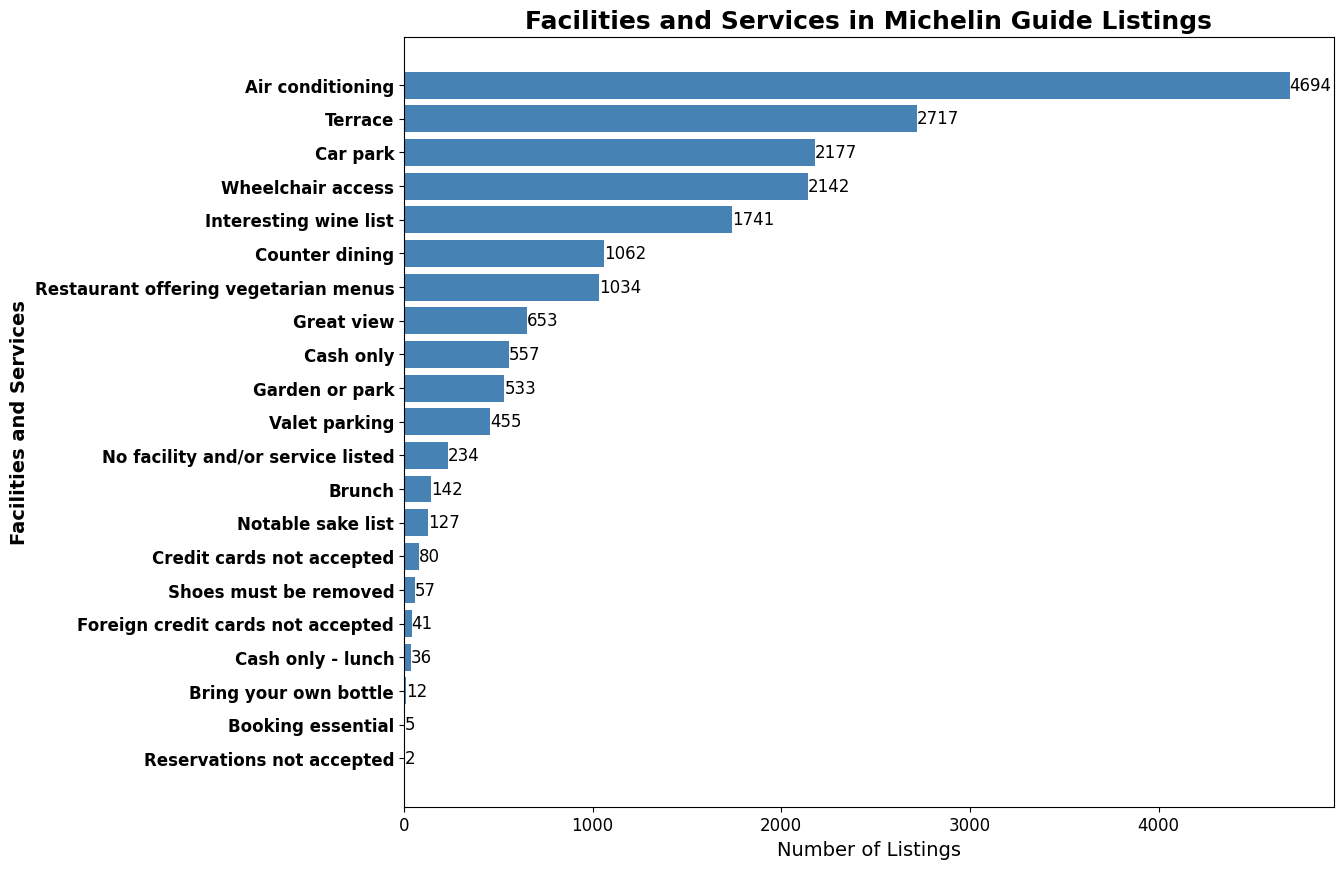

In [17]:
# Sorting the dictionary by count
sorted_facilities_and_services_count = dict(sorted(facilities_and_services_count.items(), key=lambda item: item[1], reverse=False))

# Creating lists for the bar chart
facilities = list(sorted_facilities_and_services_count.keys())
counts = list(sorted_facilities_and_services_count.values())

# Creating the bar chart
plt.figure(figsize=(12, 10))
bars = plt.barh(facilities, counts, color='steelblue')

# Add value labels to each bar
for bar in bars:
    plt.text(
        bar.get_width(),  # X position, here at the end of each bar
        bar.get_y() + bar.get_height() / 2.,  # Y position, in the middle of each bar
        f'{bar.get_width():.0f}',  # The label, which is the width of the bar (count)
        va='center',  # Center alignment vertically
        ha='left',  # Left alignment horizontally
        fontsize=12  # Font size of the text
    )

# Customize the plot
plt.xlabel('Number of Listings', fontsize=14)  # Increased fontsize
plt.ylabel('Facilities and Services', fontsize=14, fontweight='bold')  # Increased fontsize and made bold
plt.title('Facilities and Services in Michelin Guide Listings', fontsize=18, fontweight='bold')  # Increased fontsize and made bold
plt.xticks(fontsize=12)  # Increased fontsize for x-axis tick labels
plt.yticks(fontsize=12, fontweight='bold')  # Increased fontsize and made bold for y-axis tick labels
plt.show()


In [18]:
# Filter rows where the 'FacilitiesAndServices' column includes 'Cash only - lunch'
lunch_rows = michelin_df[michelin_df['FacilitiesAndServices'].str.contains("Cash only - lunch")]

# Display the filtered rows
print(lunch_rows['Award'].value_counts())


Bib Gourmand    21
1 Star          13
2 Stars          2
Name: Award, dtype: int64


---

## EDA Step 5: Price and Star Correlation

In [19]:
michelin_df[michelin_df["Price"].isna()]

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Description,Country
4634,Meiers come inn,"Kaffeestrasse 6c, Bülach, 8180, Switzerland","Bülach, Switzerland",NaN,Thai,8.536827,47.513068,4.144860e+10,https://guide.michelin.com/en/zurich-region/bl...,https://www.come-inn.ch/,Bib Gourmand,"Air conditioning,Car park,Restaurant offering ...","Slightly off the beaten track, this restaurant...",Switzerland
6761,Nit,"Rua Oscar Freire 145, São Paulo, 01409-003, Br...","São Paulo, Brazil",NaN,Spanish,-46.663807,-23.567758,5.511354e+11,https://guide.michelin.com/en/sao-paulo-region...,https://www.restaurantetanit.com.br/cardapios-nit,Bib Gourmand,Air conditioning,"The most informal and fun of Catalan chef, Osc...",Brazil


In [20]:
michelin_df.Award.value_counts()

Bib Gourmand    3333
1 Star          2844
2 Stars          474
3 Stars          143
Name: Award, dtype: int64

In [21]:
# Fill these indices with a 'Price' manually
michelin_df.loc[4634, 'Price'] = "$$"
michelin_df.loc[6761, 'Price'] = "$$$"

In [22]:
michelin_df["Price"].value_counts()[:20]

€€€€    1387
€€      1339
€€€      798
$$       573
$$$$     336
¥¥¥      330
€        307
¥¥       268
$        267
¥        201
¥¥¥¥     176
$$$      146
฿฿       115
££££     114
££        98
฿         81
£££       59
₩         49
₩₩₩₩      26
₫         25
Name: Price, dtype: int64

In [23]:
# Group the DataFrame by 'Award' and 'Price', then count the occurrences
price_distribution = michelin_df.groupby(['Award', 'Price']).size().reset_index(name='Count')

# Pivot the table to get Awards on the index and Prices on the columns
price_distribution_pivoted = price_distribution.pivot(index='Price', columns='Award', values='Count').fillna(0)

price_distribution_pivoted



Award,1 Star,2 Stars,3 Stars,Bib Gourmand
Price,,,,
$,1.0,0.0,0.0,266.0
$$,37.0,3.0,0.0,533.0
$$$,112.0,11.0,2.0,21.0
$$$$,250.0,58.0,27.0,1.0
£,0.0,0.0,0.0,4.0
££,5.0,0.0,0.0,93.0
£££,59.0,0.0,0.0,0.0
££££,88.0,18.0,8.0,0.0
¥,0.0,0.0,0.0,201.0


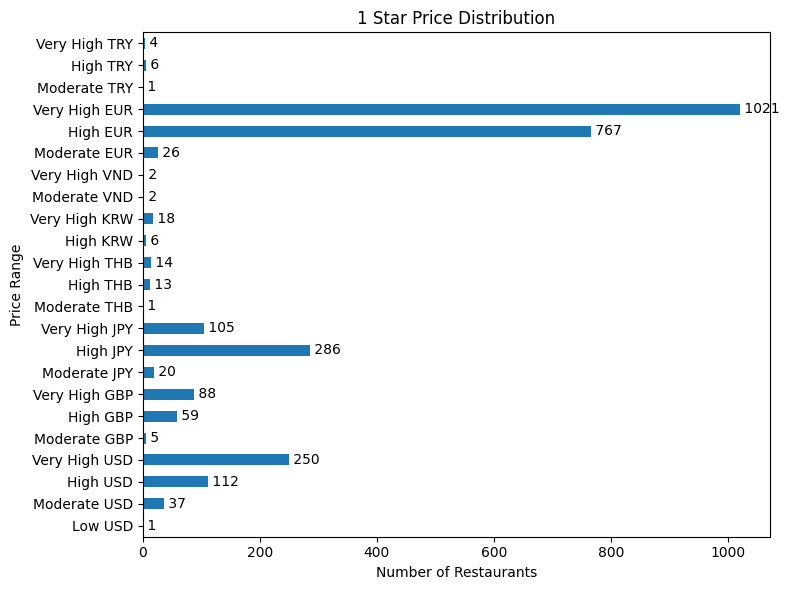

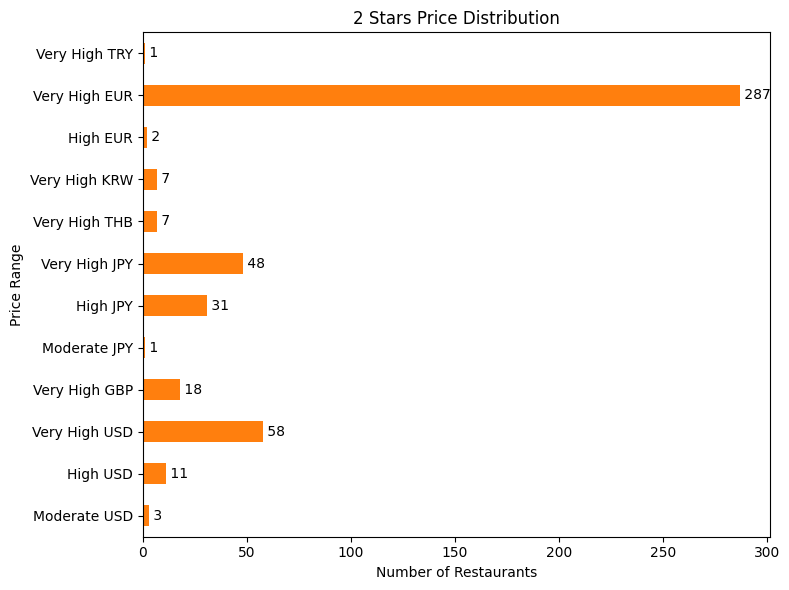

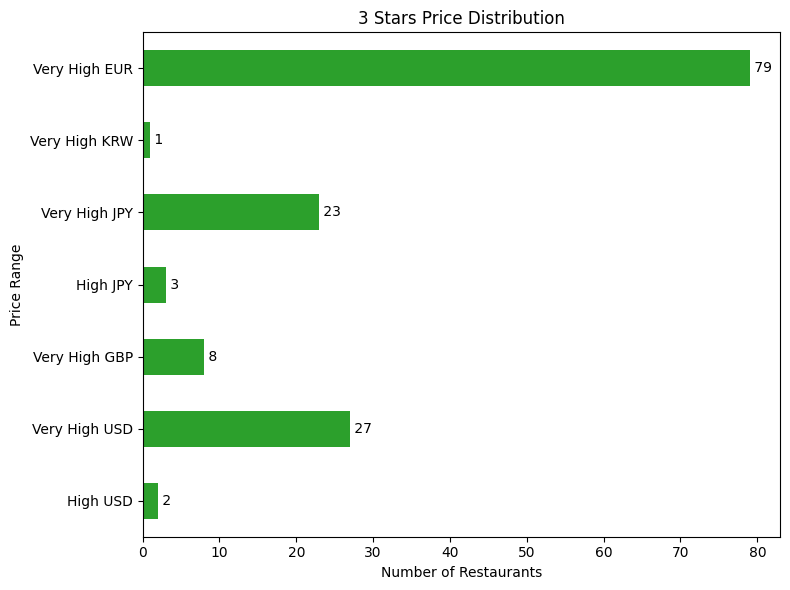

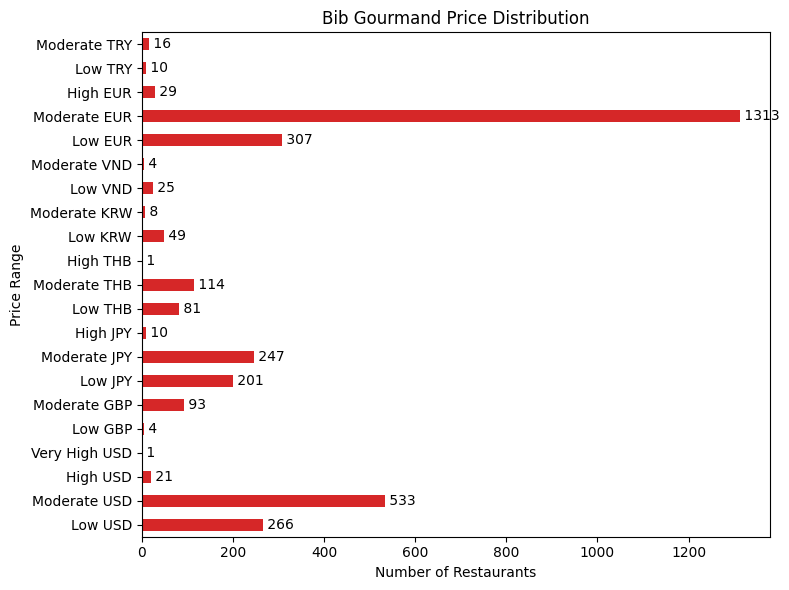

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualize manually
data = {
    'Price': ['$','$$','$$$','$$$$','£','££','£££','££££','¥','¥¥','¥¥¥','¥¥¥¥','฿','฿฿','฿฿฿','฿฿฿฿','₩','₩₩','₩₩₩','₩₩₩₩','₫','₫₫','₫₫₫₫','€','€€','€€€','€€€€','₺','₺₺','₺₺₺','₺₺₺₺'],
    '1 Star': [1, 37, 112, 250, 0, 5, 59, 88, 0, 20, 286, 105, 0, 1, 13, 14, 0, 0, 6, 18, 0, 2, 2, 0, 26, 767, 1021, 0, 1, 6, 4],
    '2 Stars': [0, 3, 11, 58, 0, 0, 0, 18, 0, 1, 31, 48, 0, 0, 0, 7, 0, 0, 0, 7, 0, 0, 0, 0, 0, 2, 287, 0, 0, 0, 1],
    '3 Stars': [0, 0, 2, 27, 0, 0, 0, 8, 0, 0, 3, 23, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 79, 0, 0, 0, 0],
    'Bib Gourmand': [266, 533, 21, 1, 4, 93, 0, 0, 201, 247, 10, 0, 81, 114, 1, 0, 49, 8, 0, 0, 25, 4, 0, 307, 1313, 29, 0, 10, 16, 0, 0]
}

df = pd.DataFrame(data)


# A mapping with currency abbreviations
price_mapping = {
    '$': 'Low USD', '$$': 'Moderate USD', '$$$': 'High USD', '$$$$': 'Very High USD',
    '£': 'Low GBP', '££': 'Moderate GBP', '£££': 'High GBP', '££££': 'Very High GBP',
    '¥': 'Low JPY', '¥¥': 'Moderate JPY', '¥¥¥': 'High JPY', '¥¥¥¥': 'Very High JPY',
    '฿': 'Low THB', '฿฿': 'Moderate THB', '฿฿฿': 'High THB', '฿฿฿฿': 'Very High THB',
    '₩': 'Low KRW', '₩₩': 'Moderate KRW', '₩₩₩': 'High KRW', '₩₩₩₩': 'Very High KRW',
    '₫': 'Low VND', '₫₫': 'Moderate VND', '₫₫₫': 'High VND', '₫₫₫₫': 'Very High VND',
    '€': 'Low EUR', '€€': 'Moderate EUR', '€€€': 'High EUR', '€€€€': 'Very High EUR',
    '₺': 'Low TRY', '₺₺': 'Moderate TRY', '₺₺₺': 'High TRY', '₺₺₺₺': 'Very High TRY',
}

# Apply the mapping to the 'Price' column
df['Price'] = df['Price'].map(price_mapping)

# Set the index to 'Price' column for plotting
df.set_index('Price', inplace=True)
awards = ['1 Star', '2 Stars', '3 Stars', 'Bib Gourmand']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example colors for the bars

for award, color in zip(awards, colors):
    # Filter out rows where the value is 0 for the current award
    filtered_df = df[df[award] > 0]

    # Create a new figure for each award category
    plt.figure(figsize=(8, 6))
    
    # Plot using horizontal bar chart ('barh')
    ax = filtered_df[award].plot(kind='barh', color=color, title=f'{award} Price Distribution')
    
    # Add value labels to each bar
    for i, (price, value) in enumerate(filtered_df[award].items()):
        ax.text(value, i, f' {value}', va='center', ha='left')

    ax.set_xlabel('Number of Restaurants')
    ax.set_ylabel('Price Range')

    # Show the plot
    plt.tight_layout()
    plt.show()


---

## EDA Step 6: Currency and Money Processing for Future Usage

`Monthly Average Income Conversion to Local Currencies for Restaurant Price Comparison`

This code block performs the following operations:

- Maps a list of countries to their respective currencies and currency symbols, setting up for currency conversion.
- Provides approximate annual average incomes in USD for each country.
- Calculates the monthly income by dividing the annual income by 12.
- Defines exchange rates for converting USD to the local currency of each country.
- Converts monthly incomes from USD to each country's local currency using the exchange rates.
- Rounds the converted monthly incomes for neatness and practicality.
- Prints each country's name alongside the respective local currency monthly average income.

The purpose of this conversion is to contextualize the average incomes in relation to the cost of dining in Michelin Guide-listed restaurants. By understanding the local purchasing power, one can assess the accessibility of these restaurants for the average person in each country. 

This data can be utilized on the website to filter restaurants by price and to compare statistics between the location of the restaurant and the financial capability of the public to dine there, enhancing user experience and providing valuable insights for market analysis.


In [25]:
michelin_df.head(3)

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices,Description,Country
0,L'OSIER,"7-5-5 Ginza, Chuo-ku, Tokyo, 104-0061, Japan","Tokyo, Japan",¥¥¥¥,"French, Contemporary",139.761203,35.669667,8.133572e+10,https://guide.michelin.com/en/tokyo-region/tok...,https://losier.shiseido.co.jp/,3 Stars,"Air conditioning,Car park,Interesting wine list",In 2023 L’OSIER celebrated the 50th anniversar...,Japan
1,Azabu Kadowaki,"2-7-2 Azabujuban, Minato-ku, Tokyo, 106-0045, ...","Tokyo, Japan",¥¥¥¥,Japanese,139.733551,35.655993,8.135772e+10,https://guide.michelin.com/en/tokyo-region/tok...,NaN,3 Stars,"Air conditioning,Counter dining",Toshiya Kadowaki’s aim is to serve up “unforge...,Japan
2,Kohaku,"3-4 Kagurazaka, Shinjuku-ku, Tokyo, 162-0825, ...","Tokyo, Japan",¥¥¥¥,Japanese,139.741008,35.700701,8.150314e+11,https://guide.michelin.com/en/tokyo-region/tok...,http://kagurazaka-kohaku.jp/,3 Stars,"Air conditioning,Counter dining,Interesting wi...",Koji Koizumi creates a cuisine all his own as ...,Japan


Additionally, the Michelin Guide categorizes restaurants by different price ranges, which can be referenced on their official website at [Michelin Guide's Price Ranges Index](https://guide.michelin.com/en/restaurants-price-ranges-index). 

This categorization helps to further analyze the affordability and accessibility of Michelin-listed restaurants relative to the average monthly income in each country. 

By integrating this price range data with the average income statistics, the website can provide a comprehensive overview of how restaurant prices align with local economic conditions, offering a nuanced tool for individuals to gauge dining options within their financial reach.


In [26]:
michelin_df.Country.value_counts().index

Index(['France', 'Japan', 'Italy', 'USA', 'Germany', 'Spain', 'United Kingdom',
       'Belgium', 'Switzerland', 'China Mainland', 'Thailand', 'Netherlands',
       'Taiwan', 'Hong Kong SAR China', 'Singapore', 'South Korea', 'Portugal',
       'Canada', 'Malaysia', 'Brazil', 'Denmark', 'United Arab Emirates',
       'Türkiye', 'Vietnam', 'Ireland', 'Sweden', 'Austria', 'Croatia',
       'Macau SAR China', 'Norway', 'Greece', 'Slovenia', 'Luxembourg',
       'Hungary', 'Argentina', 'Poland', 'Malta', 'Finland', 'Estonia',
       'Czech Republic', 'Latvia', 'Iceland', 'Serbia', 'Andorra'],
      dtype='object')

In [27]:
countries = [
    'France', 'Japan', 'Italy', 'USA', 'Germany', 'Spain', 'United Kingdom',
    'Belgium', 'Switzerland', 'China Mainland', 'Thailand', 'Netherlands',
    'Taiwan', 'Hong Kong SAR China', 'Singapore', 'South Korea', 'Portugal',
    'Canada', 'Malaysia', 'Brazil', 'Denmark', 'United Arab Emirates',
    'Türkiye', 'Vietnam', 'Ireland', 'Sweden', 'Austria', 'Croatia',
    'Macau SAR China', 'Norway', 'Greece', 'Slovenia', 'Luxembourg',
    'Hungary', 'Argentina', 'Poland', 'Malta', 'Finland', 'Estonia',
    'Czech Republic', 'Latvia', 'Iceland', 'Serbia', 'Andorra'
]

# Mapping countries to their currencies for conversion
countries_currencies = [
    'EUR', 'JPY', 'EUR', 'USD', 'EUR', 'EUR', 'GBP', 
    'EUR', 'CHF', 'CNY', 'THB', 'EUR', 
    'TWD', 'HKD', 'SGD', 'KRW', 'EUR', 
    'CAD', 'MYR', 'BRL', 'DKK', 'AED', 
    'TRY', 'VND', 'EUR', 'SEK', 'EUR', 'EUR', 
    'MOP', 'NOK', 'EUR', 'EUR', 'EUR', 
    'HUF', 'ARS', 'PLN', 'EUR', 'EUR', 'EUR', 
    'EUR', 'EUR', 'ISK', 'RSD', 'EUR'
]

# Currency symbols for printing
currency_symbols = {
    'EUR': '€', 'JPY': '¥', 'GBP': '£', 'CHF': 'CHF', 'CNY': '¥',
    'THB': '฿', 'TWD': 'NT$', 'HKD': 'HK$', 'SGD': 'S$', 'KRW': '₩',
    'CAD': 'C$', 'MYR': 'RM', 'BRL': 'R$', 'DKK': 'DKK', 'AED': 'AED',
    'TRY': '₺', 'VND': '₫', 'SEK': 'SEK', 'NOK': 'NOK', 'ISK': 'ISK',
    'USD': '$', 'PLN': 'zł', 'HUF': 'Ft', 'RSD': 'din.', 'MOP': 'MOP$', 'ARS':'ARS$'
}

# Approximate annual average incomes in USD (from the previous list)
annual_average_incomes_usd = [
    41412, 40589, 35354, 65712, 47470, 30371, 42361, 46949, 85582, 10427, 
    7590, 52321, 25848, 49722, 64184, 31977, 23550, 46363, 11589, 8890, 
    60439, 43100, 9277, 2450, 78656, 54108, 50776, 14253, 27972, 81905, 
    21402, 25634, 116681, 15840, 9912, 15848, 33722, 49314, 22984, 22918, 
    19068, 73233, 7320, 40236
]

# Monthly incomes (by dividing annual incomes by 12)
monthly_incomes_usd = [income / 12 for income in annual_average_incomes_usd]

exchange_rates_to_usd = {
    'EUR': 1.080627, # Euro zone
    'JPY': 0.006604, # Japan
    'GBP': 1.259371, # United Kingdom
    'CHF': 1.113458, # Switzerland
    'CNY': 0.138328, # China Mainland
    'THB': 0.027516, # Thailand
    'TWD': 0.031300, # Taiwan
    'HKD': 0.127866, # Hong Kong SAR China
    'SGD': 0.740825, # Singapore
    'KRW': 0.000744, # South Korea
    'CAD': 0.734767, # Canada
    'MYR': 0.211068, # Malaysia
    'BRL': 0.200020, # Brazil
    'DKK': 0.144886, # Denmark
    'AED': 0.272294, # United Arab Emirates
    'TRY': 0.031218, # Türkiye
    'VND': 0.000043, # Vietnam
    'SEK': 0.094603, # Sweden
    'NOK': 0.092992, # Norway
    'ISK': 0.007255, # Iceland
    'USD': 1, # USA and other USD users
    'PLN': 0.249916, # Poland
    'HUF': 0.002717, # Hungary
    'RSD': 0.009219, # Serbia
    'MOP': 0.124134, # Macau SAR China
    'ARS': 0.001170, # Argentine Peso
}

# Converting monthly incomes from USD to local currency using exchange rates
rounded_monthly_incomes_local = [
    round(income_usd / exchange_rates_to_usd[currency], 2)
    for income_usd, currency in zip(monthly_incomes_usd, countries_currencies)
]

# Printing country name and respective local currency monthly average income
for country, income, currency in zip(countries, rounded_monthly_incomes_local, countries_currencies):
    print(f"{country}: {currency_symbols[currency]}{income}")


France: €3193.52
Japan: ¥512176.96
Italy: €2726.35
USA: $5476.0
Germany: €3660.68
Spain: €2342.08
United Kingdom: £2803.05
Belgium: €3620.51
Switzerland: CHF6405.12
China Mainland: ¥6281.57
Thailand: ฿22986.63
Netherlands: €4034.77
Taiwan: NT$68817.89
Hong Kong SAR China: HK$32405.02
Singapore: S$7219.88
South Korea: ₩3581653.23
Portugal: €1816.08
Canada: C$5258.24
Malaysia: RM4575.54
Brazil: R$3703.8
Denmark: DKK34762.39
United Arab Emirates: AED13190.4
Türkiye: ₺24764.03
Vietnam: ₫4748062.02
Ireland: €6065.61
Sweden: SEK47662.34
Austria: €3915.63
Croatia: €1099.13
Macau SAR China: MOP$18778.09
Norway: NOK73397.89
Greece: €1650.43
Slovenia: €1976.78
Luxembourg: €8997.94
Hungary: Ft485829.96
Argentina: ARS$705982.91
Poland: zł5284.44
Malta: €2600.5
Finland: €3802.88
Estonia: €1772.43
Czech Republic: €1767.34
Latvia: €1470.44
Iceland: ISK841178.5
Serbia: din.66167.7
Andorra: €3102.83


---

In [28]:
michelin_df.columns

Index(['Name', 'Address', 'Location', 'Price', 'Cuisine', 'Longitude',
       'Latitude', 'PhoneNumber', 'Url', 'WebsiteUrl', 'Award',
       'FacilitiesAndServices', 'Description', 'Country'],
      dtype='object')

In [29]:
michelin_df.to_csv("../data/michelin_my_maps.csv", index=False)